In [1]:
#import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import VarianceThreshold

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_validate

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
pd.set_option("display.precision", 4)

In [3]:
#Reading the data
df = pd.read_csv("./precleaned-datasets/dataset_1.csv")

In [4]:
df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300,target
0,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
1,0,0,0.0,3.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
2,0,0,0.0,5.88,0.0,0,0,0,0,0,...,0.0,0,0,3,0,0,0,0.0,67772.7216,0
3,0,0,0.0,14.10,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
4,0,0,0.0,5.76,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(
    labels=["target"], axis=1), df["target"], test_size=0.33, random_state=42)

# Constant Features, Quasi-Constant Features and Duplicated Features

## Removing Constant Features

### Using Scikit-Learn

In [6]:
sel = VarianceThreshold(threshold=0.0) #Remove the features with zero variance.

In [7]:
X_train_sklearn = sel.fit_transform(X_train)

In [8]:
sel.get_support()[:10] #example of get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [9]:
print(
    f"Original dataset has {X_train.shape[1]} features and after removing the constant features {X_train_sklearn.shape[1]}.")

Original dataset has 300 features and after removing the constant features 258.


In [10]:
#Lisf of the deleted features
X_train.columns[~sel.get_support()]

Index(['var_14', 'var_23', 'var_33', 'var_34', 'var_44', 'var_61', 'var_66',
       'var_67', 'var_69', 'var_73', 'var_80', 'var_81', 'var_87', 'var_89',
       'var_92', 'var_97', 'var_99', 'var_112', 'var_113', 'var_120',
       'var_122', 'var_127', 'var_129', 'var_135', 'var_158', 'var_167',
       'var_171', 'var_178', 'var_180', 'var_182', 'var_183', 'var_195',
       'var_196', 'var_201', 'var_212', 'var_215', 'var_225', 'var_227',
       'var_248', 'var_287', 'var_294', 'var_297'],
      dtype='object')

In [11]:
feature_names = X_train.columns[sel.get_support()]

If the variables are numerical is ok, but if the variables are categorical, we need to encode them before. 

### Using Pandas

#### Method STD()

In [12]:
constant_feature = [
    feat for feat in X_train.columns if X_train[feat].std() == 0]

In [13]:
len(constant_feature)

42

In [14]:
X_train.drop(labels=constant_feature,axis=1).head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_289,var_290,var_291,var_292,var_293,var_295,var_296,var_298,var_299,var_300
23990,0,0,0.0,2.79,0.0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,0,0,0.0,0.0
8729,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,0,0,0.0,0.0
3451,0,0,0.0,2.79,0.0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,0,0,0.0,0.0
2628,0,0,0.0,2.76,0.0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,0,0,0.0,0.0
38352,0,0,0.0,2.88,0.0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,0,0,0.0,0.0


If the variables are numerical is ok, but if the variables are categorical, we need to encode them before. 

#### Method nunique()

In [15]:
# But ignore missing values, so have to be dropped by using dropna.
constant_feature_2 = [
    feat for feat in X_train.columns if X_train[feat].nunique() == 1]

In [16]:
len(constant_feature_2)

42

In [17]:
X_train.drop(labels=constant_feature_2,axis=1).head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_289,var_290,var_291,var_292,var_293,var_295,var_296,var_298,var_299,var_300
23990,0,0,0.0,2.79,0.0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,0,0,0.0,0.0
8729,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,0,0,0.0,0.0
3451,0,0,0.0,2.79,0.0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,0,0,0.0,0.0
2628,0,0,0.0,2.76,0.0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,0,0,0.0,0.0
38352,0,0,0.0,2.88,0.0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,0,0,0.0,0.0


Works with both numerical and categorical data!

## Quasi-Constant Features

In [18]:
sel = VarianceThreshold(threshold=0.01) #Remove the features with zero variance and also quasi-constant features.

In [19]:
X_train_sklearn_2 = sel.fit_transform(X_train)

In [20]:
print(
    f"Original dataset has {X_train.shape[1]} features and after removing the constant features {X_train_sklearn_2.shape[1]}.")

Original dataset has 300 features and after removing the constant features 212.


Almost of third of the features have been removed.

In [21]:
X_train.columns[~sel.get_support()]

Index(['var_2', 'var_7', 'var_9', 'var_10', 'var_14', 'var_19', 'var_23',
       'var_28', 'var_33', 'var_34', 'var_36', 'var_43', 'var_44', 'var_45',
       'var_53', 'var_54', 'var_56', 'var_61', 'var_66', 'var_67', 'var_69',
       'var_71', 'var_73', 'var_80', 'var_81', 'var_87', 'var_89', 'var_92',
       'var_97', 'var_99', 'var_104', 'var_106', 'var_112', 'var_113',
       'var_116', 'var_120', 'var_122', 'var_127', 'var_129', 'var_133',
       'var_135', 'var_137', 'var_141', 'var_146', 'var_158', 'var_167',
       'var_170', 'var_171', 'var_177', 'var_178', 'var_180', 'var_182',
       'var_183', 'var_187', 'var_189', 'var_194', 'var_195', 'var_196',
       'var_197', 'var_198', 'var_201', 'var_212', 'var_215', 'var_218',
       'var_219', 'var_223', 'var_225', 'var_227', 'var_233', 'var_234',
       'var_235', 'var_245', 'var_247', 'var_248', 'var_249', 'var_250',
       'var_251', 'var_256', 'var_260', 'var_267', 'var_274', 'var_282',
       'var_285', 'var_287', 'var_289', 

In [22]:
#To check the quasi-constant features
X_train["var_2"].value_counts(normalize=True) * 100

0    99.997
1     0.003
Name: var_2, dtype: float64

In [23]:
X_train["var_2"].value_counts(normalize=True).sort_values(ascending=False)

0    9.9997e-01
1    2.9851e-05
Name: var_2, dtype: float64

In [24]:
# Append a list of constant and quasi-constant features.
list_predominant_features = []
for i in X_train.columns:
    if X_train[i].value_counts(normalize=True).sort_values(ascending=False).values[0] > 0.998:
        list_predominant_features.append(i)

In [25]:
X_train.drop(labels=list_predominant_features,axis=1).head()

,var_4,var_5,var_8,var_13,var_15,var_16,var_17,var_18,var_19,var_21,...,var_279,var_281,var_284,var_288,var_291,var_292,var_293,var_295,var_296,var_300
23990,2.79,0.0,0,0.0,3,0.0,2.94,0.0,0,2.94,...,0.0,0,0,0.0,0,0.0,0,0,0,0.0
8729,0.00,0.0,0,0.0,0,0.0,0.00,0.0,0,0.00,...,0.0,0,0,0.0,0,0.0,0,0,0,0.0
3451,2.79,0.0,0,0.0,3,0.0,0.00,0.0,0,27.30,...,0.0,0,0,0.0,0,0.0,0,0,0,0.0
2628,2.76,0.0,0,0.0,3,0.0,0.00,0.0,0,2.82,...,0.0,0,0,0.0,0,0.0,0,0,0,0.0
38352,2.88,0.0,0,0.0,3,0.0,0.00,0.0,0,86.40,...,0.0,0,0,0.0,0,0.0,0,0,0,0.0


We removed most half of the features of the dataset!

## Removing Duplicated Features

In [26]:
duplicated_feat_pairs = {}

duplicated_feat = []

for i in tqdm(range(0, len(X_train.columns))):

    feat_1 = X_train.columns[i]

    if feat_1 not in duplicated_feat:

        duplicated_feat_pairs[feat_1] = []

        for feat_2 in X_train.columns[i + 1:]:

            if X_train[feat_1].equals(X_train[feat_2]):

                duplicated_feat_pairs[feat_1].append(feat_2)

                duplicated_feat.append(feat_2)

100%|██████████| 300/300 [00:01<00:00, 227.51it/s]


In [27]:
X_train.drop(labels=duplicated_feat,axis=1).head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_286,var_288,var_290,var_291,var_292,var_293,var_295,var_298,var_299,var_300
23990,0,0,0.0,2.79,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0
8729,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0
3451,0,0,0.0,2.79,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0
2628,0,0,0.0,2.76,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0
38352,0,0,0.0,2.88,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0


In [28]:
len(duplicated_feat)

56

56 features are duplicated!

## Using Feature-Engine

In [29]:
from feature_engine.selection import DropConstantFeatures
from feature_engine.selection import DropDuplicateFeatures

In [30]:
# Remove the constant and quasi-constant features
sel = DropConstantFeatures(tol=0.998, variables=None,
                           missing_values="raise")  # tol = Tolerance, max=1

In [31]:
sel.fit_transform(X_train).head()

,var_4,var_5,var_8,var_13,var_15,var_17,var_18,var_19,var_21,var_22,...,var_279,var_281,var_284,var_288,var_291,var_292,var_293,var_295,var_296,var_300
23990,2.79,0.0,0,0.0,3,2.94,0.0,0,2.94,0.0,...,0.0,0,0,0.0,0,0.0,0,0,0,0.0
8729,0.00,0.0,0,0.0,0,0.00,0.0,0,0.00,0.0,...,0.0,0,0,0.0,0,0.0,0,0,0,0.0
3451,2.79,0.0,0,0.0,3,0.00,0.0,0,27.30,0.0,...,0.0,0,0,0.0,0,0.0,0,0,0,0.0
2628,2.76,0.0,0,0.0,3,0.00,0.0,0,2.82,0.0,...,0.0,0,0,0.0,0,0.0,0,0,0,0.0
38352,2.88,0.0,0,0.0,3,0.00,0.0,0,86.40,0.0,...,0.0,0,0,0.0,0,0.0,0,0,0,0.0


In [32]:
sel_duplicated = DropDuplicateFeatures(variables=None, missing_values="ignore")

In [33]:
# Remove the duplicate features
sel_duplicated.fit_transform(X_train).head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_286,var_288,var_290,var_291,var_292,var_293,var_295,var_298,var_299,var_300
23990,0,0,0.0,2.79,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0
8729,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0
3451,0,0,0.0,2.79,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0
2628,0,0,0.0,2.76,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0
38352,0,0,0.0,2.88,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0


Now, with a pipeline...

In [34]:
pipeline = Pipeline(
    [("DropConstantFeatures", DropConstantFeatures(tol=0.998, variables=None, missing_values="raise")),
     ("DropDuplicateFeatures", DropDuplicateFeatures(
         variables=None, missing_values="ignore"))
     ]
)

In [35]:
pipeline.fit_transform(X_train).head()

,var_4,var_5,var_8,var_13,var_15,var_17,var_18,var_19,var_21,var_22,...,var_278,var_279,var_281,var_284,var_288,var_291,var_292,var_293,var_295,var_300
23990,2.79,0.0,0,0.0,3,2.94,0.0,0,2.94,0.0,...,0,0.0,0,0,0.0,0,0.0,0,0,0.0
8729,0.00,0.0,0,0.0,0,0.00,0.0,0,0.00,0.0,...,0,0.0,0,0,0.0,0,0.0,0,0,0.0
3451,2.79,0.0,0,0.0,3,0.00,0.0,0,27.30,0.0,...,0,0.0,0,0,0.0,0,0.0,0,0,0.0
2628,2.76,0.0,0,0.0,3,0.00,0.0,0,2.82,0.0,...,0,0.0,0,0,0.0,0,0.0,0,0,0.0
38352,2.88,0.0,0,0.0,3,0.00,0.0,0,86.40,0.0,...,0,0.0,0,0,0.0,0,0.0,0,0,0.0


Close to a half of the features have been removed...!

In [36]:
print(
    f'Number of features to be dropped during the first step: {len(pipeline["DropConstantFeatures"].features_to_drop_)}')
print(
    f'Number of features to be dropped during the second step: {len(pipeline["DropDuplicateFeatures"].features_to_drop_)}')

Number of features to be dropped during the first step: 139
Number of features to be dropped during the second step: 6


# Correlation Methods

In [37]:
#The correlation matrix
correlation_matrix = X_train.corr()

<Figure size 432x288 with 0 Axes>

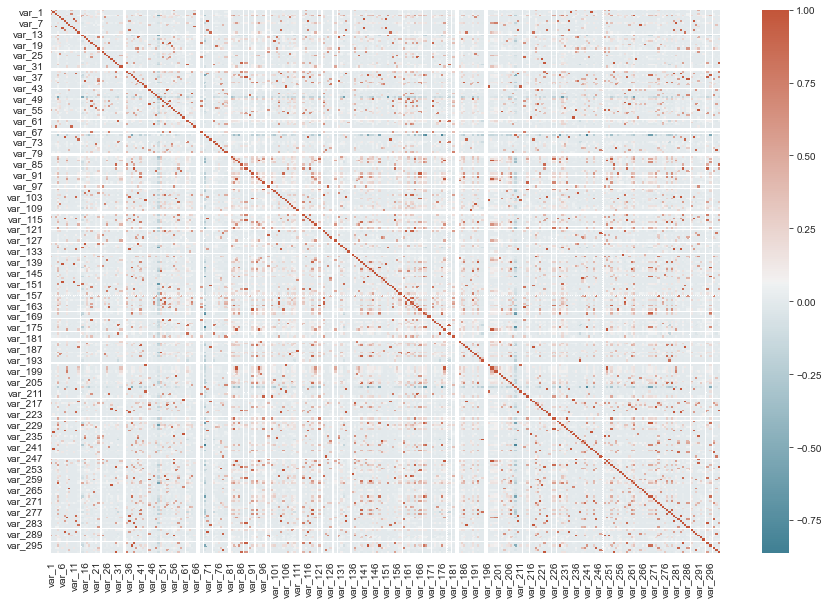

<Figure size 432x288 with 0 Axes>

In [38]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,cmap=cmap)
plt.figure()

## Brute force

In [39]:
def correlation_filter(dataset, threshold):
    correlation = set()
    correlation_matrix = dataset.corr()
    for i in tqdm(range(0, len(correlation_matrix.columns))):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j] > threshold):
                correlation.add(correlation_matrix.columns[i])
    return correlation

In [40]:
corr_feature = correlation_filter(X_train,0.8)

len(set(corr_feature))

100%|██████████| 300/300 [00:00<00:00, 320.06it/s]


139

We can remove 139 highly correlated features without impacting the performance of our machine learning algorithm.

In [41]:
X_train.drop(labels=corr_feature,axis=1).head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_271,var_274,var_275,var_276,var_287,var_288,var_292,var_293,var_294,var_297
23990,0,0,0.0,2.79,0.0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0
8729,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0
3451,0,0,0.0,2.79,0.0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0
2628,0,0,0.0,2.76,0.0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0
38352,0,0,0.0,2.88,0.0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0


## Group method

In [42]:
corr_matrix = X_train.corr()
corr_matrix = corr_matrix.abs().unstack() # Keep just the abs value
corr_matrix = corr_matrix[corr_matrix >= 0.8] #Threshold = 0.8
corr_matrix = corr_matrix[corr_matrix < 0.99999] # Not interested in self correlated features
corr_matrix = pd.DataFrame(corr_matrix).reset_index()
corr_matrix.columns = ["feature_1","feature_2","corr"]

In [43]:
corr_matrix.head()

,feature_1,feature_2,corr
0,var_3,var_65,0.8040
1,var_4,var_262,0.9816
2,var_7,var_228,0.8176
3,var_7,var_233,0.9622
4,var_8,var_281,0.9987


In [44]:
correlation = {}

for feature in corr_matrix["feature_1"].unique():
    if feature not in correlation.keys():
        correlation[feature] = corr_matrix[corr_matrix["feature_1"] == feature]

In [45]:
print(f" Number of correlated groups found: {len(correlation.keys())}")

 Number of correlated groups found: 179


After that, we can further check the features and select which ones are the most useful (less missing values, less redundancy, etc...) or use a ML algorithm to select the most important features.

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
features = list(correlation["var_12"].values[:, 1])
features.append("var_12")

In [48]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(n_jobs=-1)

In [49]:
importance = pd.concat(
    [pd.Series(features), pd.DataFrame(rf.feature_importances_)], axis=1)

In [50]:
importance.columns = ["features", "importance"]
importance.sort_values(by="importance", ascending=False)

,features,importance
5,var_233,0.5578
3,var_210,0.1564
8,var_12,0.1556
1,var_104,0.0340
4,var_223,0.0287
7,var_283,0.0266
6,var_280,0.0177
0,var_36,0.0160
2,var_133,0.0071


In that case, we would keep only the var_233 due to its relative importance compare to the rest of the features...

## With Feature-Engine

In [51]:
from feature_engine.selection import SmartCorrelatedSelection, DropCorrelatedFeatures

### Brute force approach with Feature-Engine

In [52]:
sel = DropCorrelatedFeatures(variables=None,
                             method='pearson',
                             threshold=0.8,
                             missing_values='ignore',
                             )

In [53]:
sel.fit_transform(X_train).head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_271,var_274,var_275,var_276,var_287,var_288,var_292,var_293,var_294,var_297
23990,0,0,0.0,2.79,0.0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0
8729,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0
3451,0,0,0.0,2.79,0.0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0
2628,0,0,0.0,2.76,0.0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0
38352,0,0,0.0,2.88,0.0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0


In [54]:
sel.correlated_feature_sets_[:10] #Example

[{'var_2', 'var_234', 'var_243'},
 {'var_3', 'var_65'},
 {'var_262', 'var_4'},
 {'var_11', 'var_141', 'var_151', 'var_6'},
 {'var_116', 'var_228', 'var_233', 'var_289', 'var_7', 'var_71'},
 {'var_281', 'var_8'},
 {'var_265', 'var_9'},
 {'var_104',
  'var_12',
  'var_133',
  'var_210',
  'var_223',
  'var_280',
  'var_283',
  'var_36'},
 {'var_13', 'var_153', 'var_187', 'var_217', 'var_285', 'var_72'},
 {'var_132', 'var_15', 'var_152'}]

### Group method approach with Feature-Engine

In [55]:
sel = SmartCorrelatedSelection(variables=None,
                               method='pearson',
                               threshold=0.8,
                               missing_values='ignore',
                               selection_method='model_performance', #Using a ML algorithm
                               estimator=rf, #Using the RandomForest we set up previously
                               scoring='roc_auc',
                               cv=3
                               )

In [56]:
sel.fit_transform(X_train,y_train).head()

,var_1,var_3,var_5,var_6,var_7,var_8,var_9,var_10,var_14,var_16,...,var_278,var_279,var_286,var_287,var_288,var_292,var_293,var_294,var_297,var_298
23990,0,0.0,0.0,0,0,0,0,0,0,0.0,...,0,0.0,0.0,0,0.0,0.0,0,0,0,0
8729,0,0.0,0.0,0,0,0,0,0,0,0.0,...,0,0.0,0.0,0,0.0,0.0,0,0,0,0
3451,0,0.0,0.0,0,0,0,0,0,0,0.0,...,0,0.0,0.0,0,0.0,0.0,0,0,0,0
2628,0,0.0,0.0,0,0,0,0,0,0,0.0,...,0,0.0,0.0,0,0.0,0.0,0,0,0,0
38352,0,0.0,0.0,0,0,0,0,0,0,0.0,...,0,0.0,0.0,0,0.0,0.0,0,0,0,0


In [57]:
groups = sel.correlated_feature_sets_[4]

In [58]:
sel.correlated_feature_sets_[:10] #Example

[{'var_2', 'var_234', 'var_243'},
 {'var_3', 'var_65'},
 {'var_262', 'var_4'},
 {'var_11', 'var_141', 'var_151', 'var_6'},
 {'var_116', 'var_228', 'var_233', 'var_289', 'var_7', 'var_71'},
 {'var_281', 'var_8'},
 {'var_265', 'var_9'},
 {'var_104',
  'var_12',
  'var_133',
  'var_210',
  'var_223',
  'var_280',
  'var_283',
  'var_36'},
 {'var_13', 'var_153', 'var_187', 'var_217', 'var_285', 'var_72'},
 {'var_132', 'var_15', 'var_152'}]

In [59]:
for f in groups:
    model = cross_validate(rf,
                           X_train[f].to_frame(),
                           y_train,
                           scoring="roc_auc",
                           return_estimator=False,
                           cv=3
                           )
    print(f,model["test_score"].mean())

var_7 0.50004662004662
var_228 0.50001554001554
var_71 0.50004662004662
var_116 0.50004662004662
var_233 0.50003108003108
var_289 0.50004662004662


In [60]:
#We should keep the feature with the highest score.

### Variance with Feature-Engine

In [61]:
sel = SmartCorrelatedSelection(variables=None,
                               method='pearson',
                               threshold=0.8,
                               missing_values='ignore',
                               selection_method='variance', #Using a ML algorithm
                               estimator=None, #Using the RandomForest we set up previously
                               scoring="roc_auc",
                               cv=3
                               )

In [62]:
sel.fit_transform(X_train,y_train).head()

,var_1,var_3,var_4,var_5,var_6,var_8,var_10,var_14,var_15,var_17,...,var_286,var_287,var_288,var_291,var_292,var_293,var_294,var_297,var_298,var_299
23990,0,0.0,2.79,0.0,0,0,0,0,3,2.94,...,0.0,0,0.0,0,0.0,0,0,0,0,0.0
8729,0,0.0,0.00,0.0,0,0,0,0,0,0.00,...,0.0,0,0.0,0,0.0,0,0,0,0,0.0
3451,0,0.0,2.79,0.0,0,0,0,0,3,0.00,...,0.0,0,0.0,0,0.0,0,0,0,0,0.0
2628,0,0.0,2.76,0.0,0,0,0,0,3,0.00,...,0.0,0,0.0,0,0.0,0,0,0,0,0.0
38352,0,0.0,2.88,0.0,0,0,0,0,3,0.00,...,0.0,0,0.0,0,0.0,0,0,0,0,0.0


In [63]:
sel.correlated_feature_sets_[1]

{'var_3', 'var_65'}

In [64]:
X_train[sel.correlated_feature_sets_[1]].std()

var_65    1146.4478
var_3     1412.7085
dtype: float64

We can see that the var_3 has the highest variance so it'll be kept and var_65 will be remove.

In [65]:
"var_3" in sel.features_to_drop_

False

In [66]:
"var_65" in sel.features_to_drop_

True

### Unique values with Feature-Engine

In [67]:
sel = SmartCorrelatedSelection(variables=None,
                               method='pearson',
                               threshold=0.8,
                               missing_values='ignore',
                               selection_method='cardinality', #Using values count
                               estimator=None, #Using the RandomForest we set up previously
                               scoring=None,
                               cv=3
                               )

In [68]:
sel.fit_transform(X_train,y_train).head()

,var_1,var_3,var_4,var_5,var_6,var_8,var_10,var_13,var_14,var_16,...,var_276,var_278,var_286,var_287,var_288,var_292,var_293,var_294,var_297,var_298
23990,0,0.0,2.79,0.0,0,0,0,0.0,0,0.0,...,0.0,0,0.0,0,0.0,0.0,0,0,0,0
8729,0,0.0,0.00,0.0,0,0,0,0.0,0,0.0,...,0.0,0,0.0,0,0.0,0.0,0,0,0,0
3451,0,0.0,2.79,0.0,0,0,0,0.0,0,0.0,...,0.0,0,0.0,0,0.0,0.0,0,0,0,0
2628,0,0.0,2.76,0.0,0,0,0,0.0,0,0.0,...,0.0,0,0.0,0,0.0,0.0,0,0,0,0
38352,0,0.0,2.88,0.0,0,0,0,0.0,0,0.0,...,0.0,0,0.0,0,0.0,0.0,0,0,0,0


In [69]:
sel.correlated_feature_sets_[1]

{'var_3', 'var_65'}

In [70]:
"var_3" in sel.features_to_drop_

False

In [71]:
"var_65" in sel.features_to_drop_

True

In [72]:
X_train[list(sel.correlated_feature_sets_[1])[0]].value_counts(normalize=True) * 100

0.0000         99.994
22.4652         0.003
209834.4000     0.003
Name: var_65, dtype: float64

In [73]:
X_train[list(sel.correlated_feature_sets_[1])[1]].value_counts(normalize=True) * 100

0.0000         99.9433
861.0900        0.0030
101195.4735     0.0030
15028.0560      0.0030
2641.0164       0.0030
52105.7901      0.0030
10385.4912      0.0030
207901.3365     0.0030
16086.9720      0.0030
5209.9500       0.0030
86718.0000      0.0030
12542.3100      0.0030
27.3000         0.0030
6211.5165       0.0030
25905.4866      0.0030
3583.3941       0.0030
35685.9459      0.0030
13297.0320      0.0030
7134.8904       0.0030
12644.1000      0.0030
Name: var_3, dtype: float64

It indeed keeps the features with the most different values.

### Missing values with Feature-Engine

In [74]:
sel = SmartCorrelatedSelection(variables=None,
                               method='pearson',
                               threshold=0.8,
                               missing_values='ignore',
                               selection_method='missing_values', #Using missing values
                               estimator=None, #Using the RandomForest we set up previously
                               scoring=None,
                               cv=3
                               )

In [75]:
sel.fit_transform(X_train,y_train).head()

,var_1,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_14,var_17,...,var_276,var_278,var_286,var_287,var_288,var_292,var_293,var_294,var_297,var_298
23990,0,2.79,0.0,0,0,0,0,0,0,2.94,...,0.0,0,0.0,0,0.0,0.0,0,0,0,0
8729,0,0.00,0.0,0,0,0,0,0,0,0.00,...,0.0,0,0.0,0,0.0,0.0,0,0,0,0
3451,0,2.79,0.0,0,0,0,0,0,0,0.00,...,0.0,0,0.0,0,0.0,0.0,0,0,0,0
2628,0,2.76,0.0,0,0,0,0,0,0,0.00,...,0.0,0,0.0,0,0.0,0.0,0,0,0,0
38352,0,2.88,0.0,0,0,0,0,0,0,0.00,...,0.0,0,0.0,0,0.0,0.0,0,0,0,0


In [76]:
sel.correlated_feature_sets_[1]

{'var_3', 'var_65'}

In [77]:
"var_3" in sel.features_to_drop_

True

In [78]:
"var_65" in sel.features_to_drop_

False

In [79]:
X_train[list(sel.correlated_feature_sets_[1])[0]].isnull().sum()

0

In [80]:
X_train[list(sel.correlated_feature_sets_[1])[1]].isnull().sum()

0

## Pipeline with Feature-Engine

In [81]:
pipeline = Pipeline([
    ("Constant", DropConstantFeatures(tol=0.998)),
    ("Duplicated", DropDuplicateFeatures()),
    ("Correlation", SmartCorrelatedSelection(variables=None,
                                             method='pearson',
                                             threshold=0.8,
                                             missing_values='ignore',
                                             selection_method='variance',  # Using missing values
                                             estimator=None,  # Using the RandomForest we set up previously
                                             scoring=None,
                                             cv=3
                                             ))
])

In [82]:
pipeline.fit_transform(X_train,y_train).head()

,var_4,var_5,var_8,var_13,var_15,var_17,var_18,var_22,var_25,var_26,...,var_271,var_272,var_273,var_275,var_276,var_278,var_288,var_291,var_292,var_293
23990,2.79,0.0,0,0.0,3,2.94,0.0,0.0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0.0,0
8729,0.00,0.0,0,0.0,0,0.00,0.0,0.0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0.0,0
3451,2.79,0.0,0,0.0,3,0.00,0.0,0.0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0.0,0
2628,2.76,0.0,0,0.0,3,0.00,0.0,0.0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0.0,0
38352,2.88,0.0,0,0.0,3,0.00,0.0,0.0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0.0,0


# Statistical Measure